In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.readability.metrics import SentenceLengthScore

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'de'
    return 'en'


source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    df_conf['score'] = SentenceLengthScore().get_scores(df_text.text) 
    df_confs['_'.join(file.split('_')[1:])[:-4]] = df_conf
    rs.append({
        'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf['score'])[0],
        'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf['score'])[0],
        'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf['score'])[0],
        'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf['score'])[0],
        'model': '_'.join(file.split('_')[1:-2]),
        'dataset': dataset,
        'train_test': train_test,
        'language': get_ds_language(file.split('_')[-2])
    }) 
    
df_corr = pd.DataFrame(rs)
df_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language
0,-0.025947,-0.029515,-0.059589,-0.095274,BERT,DBP-14,test,en
1,-0.025463,-0.028136,-0.054486,-0.094726,BERT,DBP-14,train,en
2,-0.094515,-0.131956,-0.034171,0.010250,BERT,TREC-6,test,en
3,-0.006063,-0.010812,0.033012,0.028712,BERT,TREC-6,train,en
4,-0.023230,-0.035149,-0.101591,-0.156168,BERT,YELP-5,test,en
5,-0.044617,-0.074414,-0.109866,-0.183283,BERT,YELP-5,train,en
6,-0.049102,-0.041237,-0.020696,-0.019800,DECISION_TREE,10K-GNAD,test,de
7,-0.040528,-0.033203,-0.015300,-0.004180,DECISION_TREE,10K-GNAD,train,de
8,-0.028023,-0.023819,-0.030101,-0.027509,DECISION_TREE,DBP-14,test,en
9,-0.032169,-0.027663,-0.035654,-0.028748,DECISION_TREE,DBP-14,train,en


In [3]:
df_corr[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

pearson_p_true    -0.026428
spearman_p_true   -0.032393
pearson_conf      -0.047696
spearman_conf     -0.069254
dtype: float64

In [4]:
df_model_corr = df_corr.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
df_model_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
model,,,,
BERT,-0.036639,-0.051664,-0.054449,-0.081748
DECISION_TREE,-0.042005,-0.048062,-0.039905,-0.030406
FASTTEXT,-0.050083,-0.053361,-0.169844,-0.216377
GERMAN_BERT,0.002604,-0.007957,0.009690,0.008716
RANDOM_FOREST,-0.000758,-0.005637,0.075560,0.056813
SVM,-0.022276,-0.025095,-0.081912,-0.119782


In [5]:
def get_latex_method_name(model_type):
    if model_type == 'GERMAN_BERT':
        return 'GER\_BERT'
    elif model_type == 'DECISION_TREE':
        return 'DT'
    elif model_type == 'RANDOM_FOREST':
        return 'RF'
    elif model_type == 'FASTTEXT':
        return 'FT'
    elif model_type == 'DUMMY':
        return 'BASE'
    return model_type.replace('_', '\_')

def get_latex_metric(metric_str, max_abs_score, method):
    is_max = np.abs(metric_str) == max_abs_score
    
    metric_str = np.round(metric_str,3)
    if is_max:
        return '\mathbf{' + str(metric_str) + '}'
    return metric_str

In [6]:
reported_methods = ['DUMMY', 'DECISION_TREE', 'RANDOM_FOREST', 'SVM', 'FASTTEXT', 'BERT', 'GERMAN_BERT']
print("""
\\begin{table}[]
    \small
    \centering
    \\begin{tabular}{l|cc|cc}
        Method & $r$ & $\\rho$ & $r'$ & $\\rho'$ \\\\ \hline
""")

for method in reported_methods:
    if method not in df_model_corr.index:
        continue
    s = ' ' * 8
    s += '\\textit{' + get_latex_method_name(method) + '} & '
    s += ' & '.join([f'${get_latex_metric(df_model_corr.loc[method, metric], df_model_corr.abs().max()[metric], method)}$' for metric in df_model_corr.columns])
    s +=  ' \\\\'
    print(s)

print("""
    \end{tabular}
    \caption[Correlation between average sentence length and classification metrics]{Pearson and Spearman correlation coefficients for average sentence length and the ratio of correct model instances $(r, \\rho)$, and the average prediction confidence $(r', \\rho')$}
    \label{tab:corr_wcount}
\end{table}
""")


\begin{table}[]
    \small
    \centering
    \begin{tabular}{l|cc|cc}
        Method & $r$ & $\rho$ & $r'$ & $\rho'$ \\ \hline

        \textit{DT} & $-0.042$ & $-0.048$ & $-0.04$ & $-0.03$ \\
        \textit{RF} & $-0.001$ & $-0.006$ & $0.076$ & $0.057$ \\
        \textit{SVM} & $-0.022$ & $-0.025$ & $-0.082$ & $-0.12$ \\
        \textit{FT} & $\mathbf{-0.05}$ & $\mathbf{-0.053}$ & $\mathbf{-0.17}$ & $\mathbf{-0.216}$ \\
        \textit{BERT} & $-0.037$ & $-0.052$ & $-0.054$ & $-0.082$ \\
        \textit{GER\_BERT} & $0.003$ & $-0.008$ & $0.01$ & $0.009$ \\

    \end{tabular}
    \caption[Correlation between average sentence length and classification metrics]{Pearson and Spearman correlation coefficients for average sentence length and the ratio of correct model instances $(r, \rho)$, and the average prediction confidence $(r', \rho')$}
    \label{tab:corr_wcount}
\end{table}



In [7]:
df_corr.groupby(['dataset'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
dataset,,,,
10K-GNAD,-0.043142,-0.041300,-0.097454,-0.090929
DBP-14,-0.028019,-0.028604,-0.044728,-0.092114
GERMEVAL-2018,-0.005861,-0.019286,-0.018862,-0.066115
GERMEVAL-2020,0.024838,0.033625,0.088993,0.097513
TREC-6,-0.078615,-0.110105,-0.157394,-0.152570
YELP-5,-0.027766,-0.028688,-0.056731,-0.111306


<AxesSubplot:xlabel='score', ylabel='mean'>

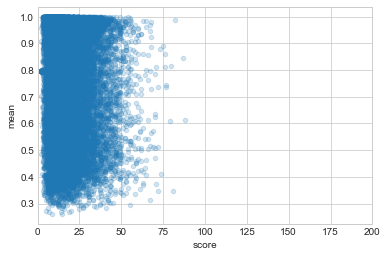

In [8]:
df_confs['FASTTEXT_GERMEVAL-2020_test'].plot(x='score', y='mean', kind='scatter', alpha=.2, xlim=(0,200))

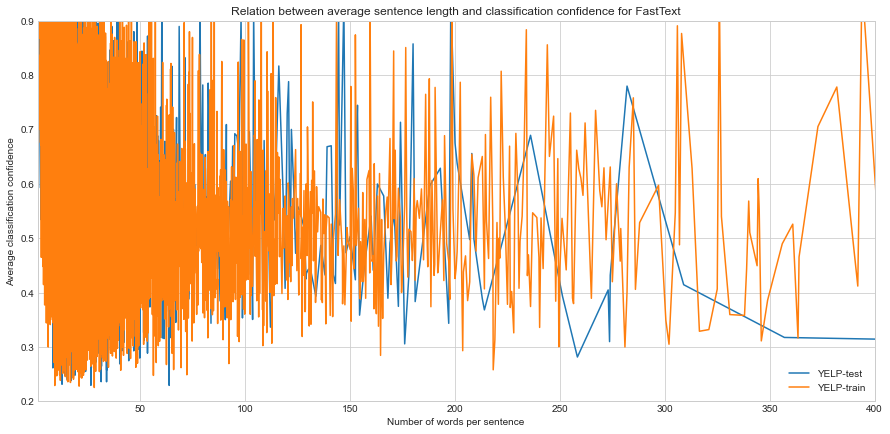

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ds_keys = [ds for ds in df_confs if 'FASTTEXT_YELP' in ds]
for ds in ds_keys:
    df_confs[ds].groupby(['score'])['mean'].mean().plot(ax=ax, xlim=(1,400), ylim=(0.2,0.9))
    
plt.title('Relation between average sentence length and classification confidence for FastText')
plt.xlabel('Number of words per sentence')
plt.ylabel('Average classification confidence')
ax.legend(['YELP-test', 'YELP-train'])
plt.savefig(f'confidence/010_corr_avgsenlen_yelp.pdf')
plt.show()